In [1]:
import warnings
warnings.filterwarnings('ignore')
import picaso.justdoit as jdi
import astropy.units as u
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
mh = '+0.0'
CtoO = '1.0'


filename_db="/Users/sagnickmukherjee/Documents/GitHub/picaso-dev/reference/opacities/ck_cx_cont_opacities.db"
ck_db='/Users/sagnickmukherjee/Documents/software/picaso-dev/reference/opacities/ck_db/sonora_2020_feh+000_co_100.data.196'

opacity_ck = jdi.opannection(ck=True, ck_db=ck_db,filename_db=filename_db)


In [3]:
T_eff= 700
grav = 1780
nlevel = 91

## Brown Dwarf 
T_star = "NA"
semi_major = "NA" # AU
self_consistent_kzz= True # Only needed if you want to do on-the-fly calculation with MLT Kzz
##


# Lets use Kzz = 1d4 in cgs

In [4]:
cl_run = jdi.inputs(calculation="brown", climate = True)

cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)'))
cl_run.T_eff(Teff=T_eff)




pressure=np.logspace(np.log10(1.77000392e-04),np.log10(320.0),nlevel) # set your pressure grid
temp_guess = np.zeros(shape=(nlevel))
kz = np.zeros(shape =(nlevel))

## load a bobcat model
pressure_dummy,temp_guess = np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/Evolution/structures_m+0.0/t"+str(700)+"g1780"+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)

for i in range(len(temp_guess)):
    temp_guess[i] = temp_guess[i]+50 # perturb the profile
    kz[i] = 1e4 #0
    
nofczns = 1
nstr = np.array([0,86,89,0,0,0]) # initial guess of convective zones
rfacv = 0.0
rfaci =1.0
cloudy = False # not cloudy
fsed = 0.0

In [5]:
cl_run.inputs_climate(temp_guess= temp_guess, pressure= pressure, nstr = nstr, nofczns = nofczns , rfacv = rfacv, rfaci = rfaci, cloudy = cloudy, mh = mh, CtoO = CtoO,species = ['MgSiO3','Mg2SiO4','Fe'], fsed = fsed)


In [6]:
t0 = time.time()
pressure , temp, dtdp, nstr_new, flux_plus_final,quench_levels, df, all_profiles, all_kzz = cl_run.run_climate_model(opacity_ck,save_all_profiles=True, save_all_kzz = True,diseq_chem = True, self_consistent_kzz =self_consistent_kzz, kz = kz,vulcan_run = False)
t1 = time.time()

Iteration number  0 , min , max temp  245.56282118969816 2422.067777190069 , flux balance  0.09986266845705828
Iteration number  1 , min , max temp  229.9212382929608 2452.4508590806677 , flux balance  0.0036136412123924603
Iteration number  2 , min , max temp  227.55184724875252 2451.738623133959 , flux balance  6.760012558140841e-06
 We are already at a root, tolf , test =  5e-05 ,  6.760012558140841e-06
Big iteration is  227.55184724875252 0
Iteration number  0 , min , max temp  218.30065783113264 2512.1101550813482 , flux balance  0.0005981871258249509
Iteration number  1 , min , max temp  217.41404843703813 2509.5365816370536 , flux balance  3.494923957820341e-07
Converged Solution in iterations  1
Big iteration is  217.41404843703813 1
Iteration number  0 , min , max temp  215.25458727799577 2537.7372567208727 , flux balance  2.348067627143651e-05
Iteration number  1 , min , max temp  215.21033775690668 2537.1886499190173 , flux balance  4.906637003918218e-09
Converged Solution i

Big iteration is  211.16321925658215 0
Iteration number  0 , min , max temp  211.1567739776751 2272.5584461860853 , flux balance  9.602226610602214e-07
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [79 72 85 78]
Profile converged
[ 0 65 72 72 83 89]
Iteration number  0 , min , max temp  211.09878480065626 2276.1748961909884 , flux balance  6.232734902922263e-06
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [79 72 85 78]
Big iteration is  211.09878480065626 0
Iteration number  0 , min , max temp  211.09535564062043 2276.1227638594664 , flux balance  4.3403566774706627e-07
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [79 72 85 78]
Profile converged
final [ 0 65 72 72 83 89]
Iteration number  0 , min , max temp  211.0957200491819 2276.1298557328923 , flux balance  3.090678562659093e-06
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [79 72 85 78]
Big iteration is  211.0957200491819 0

In [10]:
pphil_deq,tphil_deq = np.loadtxt("Benchmarking/chem_T700_lg5.5_NEQ_strong.txt",usecols=[1,2],unpack=True)


Text(0.5, 1.0, 'T$_{\\rm eff}$= 1000 K, log(g)=5.0')

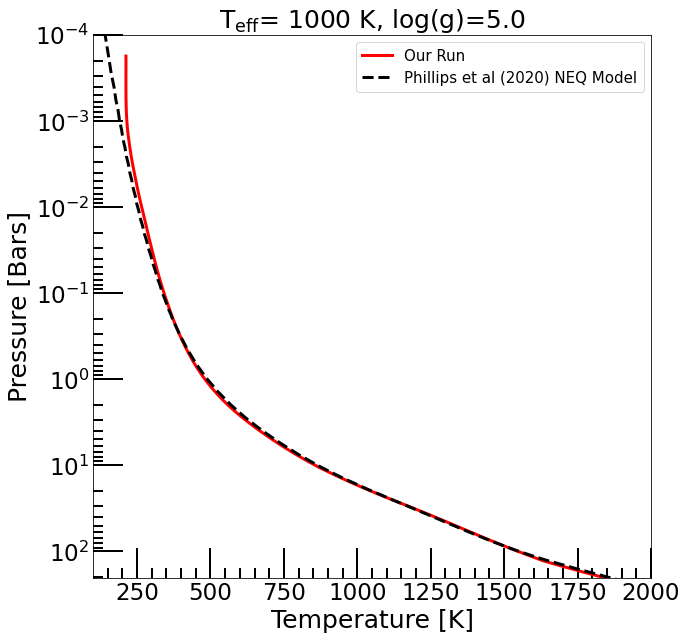

In [12]:
pressure_bobcat,temp_bobcat = np.loadtxt("/Users/sagnickmukherjee/Documents/GitHub/Disequilibrium-Picaso/t"+str(1000)+"g1000"+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)

plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Temperature [K]', fontsize=25)
plt.ylim(205,1e-4)
plt.xlim(100,2000)

plt.semilogy(temp,pressure,color="r",linewidth=3,label="Our Run")
plt.semilogy(tphil_deq,pphil_deq,color="k",linestyle="--",linewidth=3,label="Phillips et al (2020) NEQ Model")


plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

plt.legend(fontsize=15)

plt.title(r"T$_{\rm eff}$= 1000 K, log(g)=5.0",fontsize=25)



In [55]:
t_eq,p_eq,df_eq,all_profiles_eq,all_kzz_eq = np.copy(temp), np.copy(pressure), df,np.copy(all_profiles),np.copy(all_kzz)




In [56]:
a=int(len(all_profiles_eq)/91)
b=int(len(all_kzz_eq)/91)

step1 = a-b-1
step1 =16
print(step1)

16


In [57]:
from numpy import log10
def dtdp(p,t):
    dtdp = np.zeros(len(t))
    for i in range(len(p)-1):
        dtdp[i] = np.log10(t[i+1]/t[i])/np.log10(p[i+1]/p[i])
    dtdp[-1] = dtdp[-2]
    return dtdp 

def did_grad_cp( t, p, t_table, p_table, grad, cp, calc_type):
    """
    Parameters
    ----------
    t : float
        Temperature  value
    p : float 
        Pressure value
    t_table : array 
        array of Temperature values with 53 entries
    p_table : array 
        array of Pressure value with 26 entries
    grad : array 
        array of gradients of dimension 53*26
    cp : array 
        array of cp of dimension 53*26
    calc_type : int 
        not used to make compatible with nopython. 
    
    Returns
    -------
    float 
        grad_x,cp_x
    
    """
    # Python version of DIDGRAD function in convec.f in EGP
    # This has been benchmarked with the fortran version
    
       
    temp_log= log10(t)
    pres_log= log10(p)
    
    pos_t = locate(t_table, temp_log)
    pos_p = locate(p_table, pres_log)

    ipflag=0
    if pos_p ==0: ## lowest pressure point
        factkp= 0.0
        ipflag=1
    elif pos_p ==25 : ## highest pressure point
        factkp= 1.0
        pos_p=24  ## use highest point
        ipflag=1

    itflag=0
    if pos_t ==0: ## lowest pressure point
        factkt= 0.0
        itflag=1
    elif pos_t == 52 : ## highest temp point
        factkt= 1.0
        pos_t=51 ## use highest point
        itflag=1
    
    if (pos_p > 0) and (pos_p < 26) and (ipflag == 0):
        factkp= (-p_table[pos_p]+pres_log)/(p_table[pos_p+1]-p_table[pos_p])
    
    if (pos_t > 0) and (pos_t < 53) and (itflag == 0):
        factkt= (-t_table[pos_t]+temp_log)/(t_table[pos_t+1]-t_table[pos_t])

    
    gp1 = grad[pos_t,pos_p]
    gp2 = grad[pos_t+1,pos_p]
    gp3 = grad[pos_t+1,pos_p+1]
    gp4 = grad[pos_t,pos_p+1]

    cp1 = cp[pos_t,pos_p]
    cp2 = cp[pos_t+1,pos_p]
    cp3 = cp[pos_t+1,pos_p+1]
    cp4 = cp[pos_t,pos_p+1]


    

    grad_x = (1.0-factkt)*(1.0-factkp)*gp1 + factkt*(1.0-factkp)*gp2 + factkt*factkp*gp3 + (1.0-factkt)*factkp*gp4
    cp_x= (1.0-factkt)*(1.0-factkp)*cp1 + factkt*(1.0-factkp)*cp2 + factkt*factkp*cp3 + (1.0-factkt)*factkp*cp4
    cp_x= 10**cp_x
    
    
    return grad_x,cp_x
def locate(array,value):
    """
    Parameters
    ----------
    array : array
        Array to be searched.
    value : float 
        Value to be searched for.
    
    
    Returns
    -------
    int 
        location of nearest point by bisection method 
    
    """
    # this is from numerical recipes
    
    n = len(array)
    
    
    jl = 0
    ju = n
    while (ju-jl > 1):
        jm=int(0.5*(ju+jl)) 
        if (value >= array[jm]):
            jl=jm
        else:
            ju=jm
    
    if (value <= array[0]): # if value lower than first point
        jl=0
    elif (value >= array[-1]): # if value higher than first point
        jl= n-1
    
    return jl

def t_chem_co(pressure,temp):
    pressure= np.array(pressure)
    temp = np.array(temp)
    ar = (3.2365e-6/pressure)*np.exp(42000/temp)
    return ar

def t_chem_co2(pressure,temp):
    pressure= np.array(pressure)
    temp = np.array(temp)
    ar = (1e-10/(pressure**0.5))*np.exp(38000./temp)
    return ar
def t_chem_nh3(pressure,temp):
    pressure= np.array(pressure)
    temp = np.array(temp)
    ar = (1e-7/pressure)*np.exp(52000/temp)
    return ar

def t_chem_hcn(pressure,temp):
    pressure= np.array(pressure)
    temp = np.array(temp)
    ar = (1.5e-4/(pressure*(3.**0.7)))*np.exp(36000./temp)
    return ar

def t_chem_ph3(pressure,temp,oh):
    pressure= np.array(pressure)
    temp = np.array(temp)
    oh_numb = oh
    
    ar = 0.19047619047*1e13*np.exp(6013.6/temp)/oh_numb # https://iopscience.iop.org/article/10.1086/428493/pdf
    return ar

def OH_conc(temp,press,x_h2o,x_h2):
    K = 10**(3.672 - (14791/temp))
    kb= 1.3807e-16 #cgs
    
    x_oh = K * x_h2o * (x_h2**(-0.5)) * (press**(-0.5))
    press_cgs = press*1e6
    
    n = press_cgs/(kb*temp)
    
    return x_oh*n



t_table=np.loadtxt('reference/climate_INPUTS/tlog',usecols=[0],unpack=True)
p_table=np.loadtxt('reference/climate_INPUTS/plog',usecols=[0],unpack=True)

grad=np.zeros(shape=(53,26))
cp = np.zeros(shape=(53,26))

grad_inp, i_inp, j_inp = np.loadtxt('reference/climate_INPUTS/GRAD_FOR_PY_Y28',usecols=[0,1,2],unpack=True)
for i in range(len(grad_inp)):
    grad[int(i_inp[i]-1),int(j_inp[i]-1)]=grad_inp[i]


In [58]:
co,h2o,nh3,ch4,dtdp_arr,grad_arr = np.zeros(len(all_profiles_eq)),np.zeros(len(all_profiles_eq)),np.zeros(len(all_profiles_eq)),np.zeros(len(all_profiles_eq)),np.zeros(len(all_profiles_eq)),np.zeros(len(all_profiles_eq))
spec = np.zeros(shape =(int(len(all_profiles_eq)/91),196))
ct=0
ct1 = 0
for i in range(int(len(all_profiles_eq)/91)):
#for i in range(5):
    bd = jdi.inputs(calculation='brown')

    bd.phase_angle(0)
    bd.gravity(gravity=1000 , gravity_unit=u.Unit('m/s**2'))

    sonora_profile_db = '/Users/sagnickmukherjee/Documents/software/sonora/profile/'
    Teff_dummy = 1000
    bd.sonora(sonora_profile_db, Teff_dummy)
    
    bd.inputs['atmosphere']['profile']['pressure'] =p_eq
    bd.inputs['atmosphere']['profile']['temperature'] = all_profiles_eq[i*91:(i+1)*91]
    bd.premix_atmosphere(opacity_ck,bd.inputs['atmosphere']['profile'])
    
    if i >= step1+2:
        tmix = all_kzz_eq[ct1*91:(ct1+1)*91]
        t_co = t_chem_co(p_eq,all_profiles_eq[i*91:(i+1)*91])
        t_co2 = t_chem_co2(p_eq,all_profiles_eq[i*91:(i+1)*91])
        t_nh3 = t_chem_nh3(p_eq,all_profiles_eq[i*91:(i+1)*91])
        t_hcn = t_chem_hcn(p_eq,all_profiles_eq[i*91:(i+1)*91])
        #OH = OH_conc(df1['temperature'],df1['pressure'],df1['H2O'],df1['H2'])
        #t_ph3 = t_chem_ph3(df1['pressure'],df1['temperature'],OH) 
        qvmrs=np.zeros(shape=(5))
        qvmrs2=np.zeros(shape=(3))
        nlevel = len(all_profiles_eq[i*91:(i+1)*91])
        #print(ph3_time)

        for jj in range(nlevel-1,0,-1):

            if ((tmix[jj-1]/1e15) <=  (t_co[jj-1]/1e15)) and ((tmix[jj]/1e15) >=  (t_co[jj]/1e15)):
                qp_co= jj
                break

        for jj in range(nlevel-1,0,-1):

            if ((tmix[jj-1]/1e15) <=  (t_nh3[jj-1]/1e15)) and ((tmix[jj]/1e15) >=  (t_nh3[jj]/1e15)):
                qp_nh3= jj
                break
        for jj in range(nlevel-1,0,-1):

            if ((tmix[jj-1]/1e15) <=  (t_co2[jj-1]/1e15)) and ((tmix[jj]/1e15) >=  (t_co2[jj]/1e15)):
                qp_co2= jj
                break
        for jj in range(nlevel-1,0,-1):

            if ((tmix[jj-1]/1e15) <=  (t_hcn[jj-1]/1e15)) and ((tmix[jj]/1e15) >=  (t_hcn[jj]/1e15)):
                qp_hcn= jj
                break

        qvmrs[0] = bd.inputs['atmosphere']['profile']['CH4'][qp_co]
        qvmrs[1] = bd.inputs['atmosphere']['profile']['H2O'][qp_co]
        qvmrs[2] = bd.inputs['atmosphere']['profile']['CO'][qp_co]

        qvmrs2[0] = bd.inputs['atmosphere']['profile']['CO2'][qp_co2]

        qvmrs[3] = bd.inputs['atmosphere']['profile']['NH3'][qp_nh3]
        qvmrs2[1] = bd.inputs['atmosphere']['profile']['N2'][qp_nh3]

        qvmrs2[2] = bd.inputs['atmosphere']['profile']['HCN'][qp_hcn]

        qvmrs[4]  =1- np.sum(qvmrs[:4])

        ### difference between equilibrium and quench abundances above quench points
        dq_h2o =  bd.inputs['atmosphere']['profile']['H2O'][0:qp_co+1] - qvmrs[1]
        dq_ch4 =  bd.inputs['atmosphere']['profile']['CH4'][0:qp_co+1] - qvmrs[0]
        dq_co  =  bd.inputs['atmosphere']['profile']['CO'][0:qp_co+1]- qvmrs[2]
        dq_co2 =  bd.inputs['atmosphere']['profile']['CO2'][0:qp_co2+1] - qvmrs2[0]
        dq_nh3 =  bd.inputs['atmosphere']['profile']['NH3'][0:qp_nh3+1] - qvmrs[3]
        dq_n2  =  bd.inputs['atmosphere']['profile']['NH3'][0:qp_nh3+1] - qvmrs2[1]
        dq_hcn =  bd.inputs['atmosphere']['profile']['HCN'][0:qp_hcn+1] - qvmrs2[2]
        # first quench ch4/co/h2o
        bd.inputs['atmosphere']['profile']['CO'][0:qp_co+1] = bd.inputs['atmosphere']['profile']['CO'][0:qp_co+1]*0.0 + qvmrs[2]
        bd.inputs['atmosphere']['profile']['CH4'][0:qp_co+1] = bd.inputs['atmosphere']['profile']['CH4'][0:qp_co+1]*0.0 + qvmrs[0]
        bd.inputs['atmosphere']['profile']['H2O'][0:qp_co+1] = bd.inputs['atmosphere']['profile']['H2O'][0:qp_co+1]*0.0 + qvmrs[1]

        # then quench co2
        bd.inputs['atmosphere']['profile']['CO2'][0:qp_co2+1] = bd.inputs['atmosphere']['profile']['CO2'][0:qp_co2+1]*0.0 + qvmrs2[0]

        # then quench nh3 and n2

        bd.inputs['atmosphere']['profile']['NH3'][0:qp_nh3+1] = bd.inputs['atmosphere']['profile']['NH3'][0:qp_nh3+1]*0.0 + qvmrs[3]
        bd.inputs['atmosphere']['profile']['N2'][0:qp_nh3+1] = bd.inputs['atmosphere']['profile']['N2'][0:qp_nh3+1]*0.0 + qvmrs2[1]

        # then quench hcn
        bd.inputs['atmosphere']['profile']['HCN'][0:qp_hcn+1] = bd.inputs['atmosphere']['profile']['HCN'][0:qp_hcn+1]*0.0 + qvmrs2[2]
        # lastly quench H2 accordingly
        bd.inputs['atmosphere']['profile']['H2'][0:qp_co+1] -= (dq_co + dq_ch4 + dq_h2o) 
        bd.inputs['atmosphere']['profile']['H2'][0:qp_co2+1] -= (dq_co2)
        bd.inputs['atmosphere']['profile']['H2'][0:qp_nh3+1] -= (dq_nh3 + dq_n2)
        bd.inputs['atmosphere']['profile']['H2'][0:qp_hcn+1] -= (dq_hcn)
        
        ct1+=0
    
    df_spec = bd.spectrum(opacity_ck,full_output=True)
    spec[i,:] = df_spec['thermal']
    
    co[i*91:(i+1)*91] = bd.inputs['atmosphere']['profile']['CO']
    h2o[i*91:(i+1)*91] = bd.inputs['atmosphere']['profile']['H2O']
    nh3[i*91:(i+1)*91] = bd.inputs['atmosphere']['profile']['NH3']
    ch4[i*91:(i+1)*91] = bd.inputs['atmosphere']['profile']['CH4']
    
    
    
    dtdp_arr[i*91:(i+1)*91] = dtdp(p_eq,all_profiles_eq[i*91:(i+1)*91])
    for jj in range(len(all_profiles_eq[i*91:(i+1)*91])):
        grad_back,cp_back = did_grad_cp(all_profiles_eq[ct], p_eq[jj], t_table, p_table, grad, grad*0, 0)
        grad_arr[ct] = grad_back
        ct+=1
    #x,y = jdi.mean_regrid(1e4/df_spec['wavenumber'], df_spec['thermal'], R=500)
    
    
    


In [59]:
wh = np.where( (1e4/df_spec['wavenumber'] > 0.0) & (1e4/df_spec['wavenumber'] < 6))
wv = 1e4/df_spec['wavenumber'][wh]


In [60]:
pressure_bobcat,temp_bobcat = np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/Evolution/structures_m+0.0/t"+str(700)+"g1780"+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)


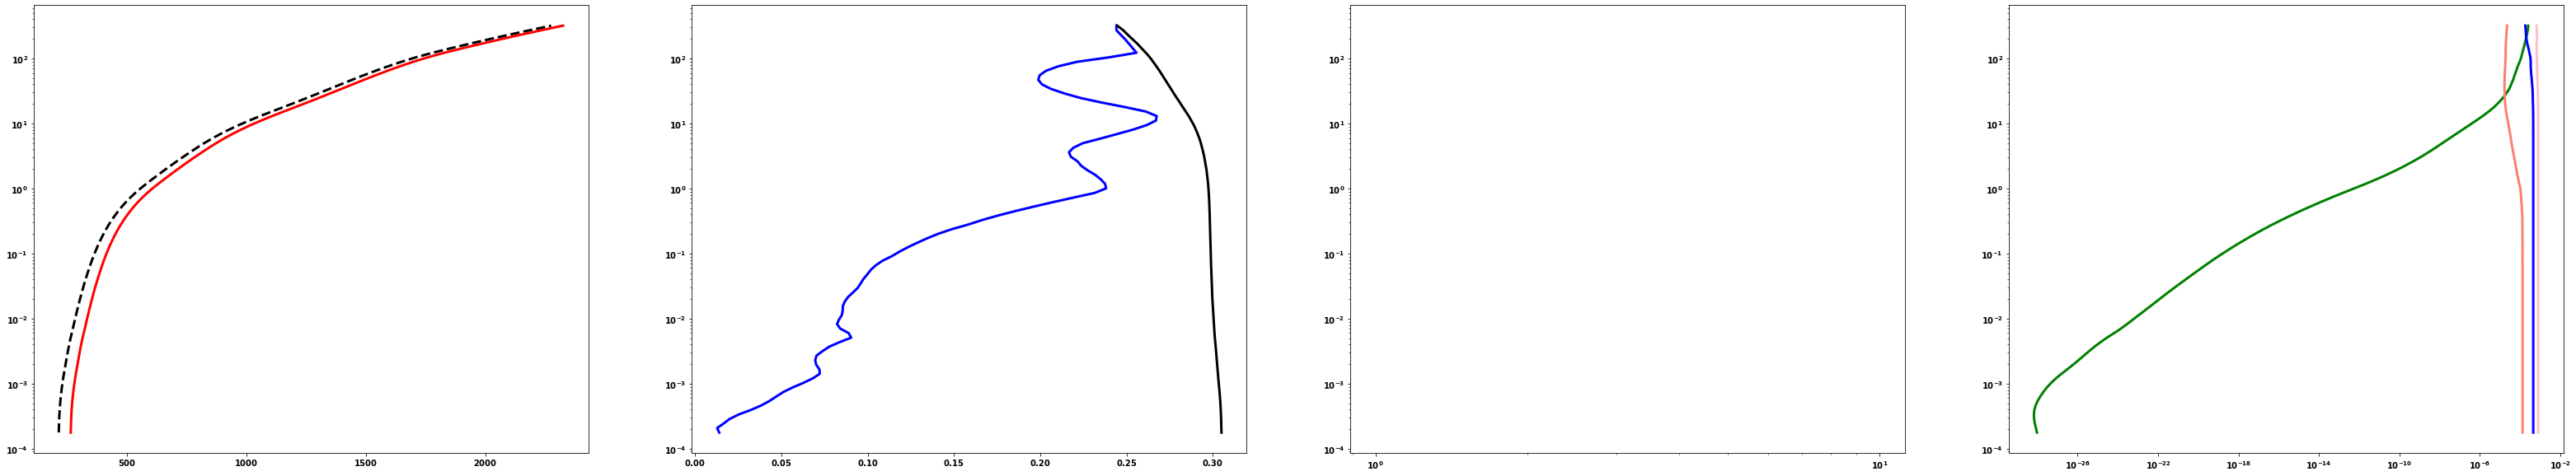

In [61]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

writergif = animation.PillowWriter(fps=3) 


x='''
AA.DD.CC.BB
'''
fig = plt.figure(figsize=(55,10))
ax = fig.subplot_mosaic(x,gridspec_kw={
        # set the height ratios between the rows
        "height_ratios": [1],
        # set the width ratios between the columns
        "width_ratios": [1,1,0.1,1,1,0.1,1,1,0.1,1,1]})

temp = all_profiles_eq[0*91:(0+1)*91]
line, = ax['A'].semilogy(temp, p_eq,linewidth=3,color='r',label="This Model")
line0, = ax['A'].semilogy(temp_bobcat,pressure_bobcat,color="k",linestyle="--",linewidth=3,label="SONORA Bobcat")

line1, = ax['B'].loglog(co[0:91], p_eq,linewidth=3,color='g',label="CO")
line2, = ax['B'].loglog(ch4[0:91], p_eq,linewidth=3,color='b',label="CH$_4$")
line3, = ax['C'].loglog(0*p_eq, p_eq,linewidth=3,color="k",linestyle="--",label=r"T$_{\rm {mix}}$")
line8, = ax['C'].loglog(0*p_eq, p_eq,linewidth=3,color="r",label=r"T$_{\rm {CO}}$")
line9, = ax['C'].loglog(0*p_eq, p_eq,linewidth=3,color="g",label=r"T$_{\rm {CO_2}}$")
line10, = ax['C'].loglog(0*p_eq, p_eq,linewidth=3,color="b",label=r"T$_{\rm {NH_3}}$")
line11, = ax['C'].loglog(0*p_eq, p_eq,linewidth=3,color="y",label=r"T$_{\rm {HCN}}$")
line4, = ax['B'].loglog(h2o[0:91], p_eq,linewidth=3,color='pink',label="H$_2$O")
line5, = ax['B'].loglog(nh3[0:91], p_eq,linewidth=3,color='salmon',label="NH$_3$")
line6, = ax['D'].semilogy(dtdp_arr[0:91], p_eq,linewidth=3,color='blue',label="Profile Lapse-Rate")
line7, = ax['D'].semilogy(grad_arr[0:91], p_eq,linewidth=3,color='k',label="Adiabatic Lapse-Rate")
#text to display the current frame
#time_text = ax['A'].text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top')

#Init function ti initialize variables 
def init():
    #line.set_ydata(np.ma.array(x, mask=True))
    
    ax['A'].set_xlabel('Temperature [K]',fontsize=40)
    ax['A'].set_ylabel('Pressure [Bars]',fontsize=40)
    ax['A'].set_xlim(200,2300)
    ax['A'].set_ylim(300,1.8e-4)
    ax['A'].legend(fontsize=35)
    ax['D'].set_xlabel('dlnT/dlnP',fontsize=40)
    ax['D'].set_ylabel('Pressure [Bars]',fontsize=40)
    ax['D'].set_xlim(0,0.38)
    ax['D'].set_ylim(300,1.8e-4)
    ax['D'].legend(fontsize=35,loc="upper right")
    ax['B'].set_xlabel('Abundance [V/V]',fontsize=40)
    ax['B'].set_ylabel('Pressure [Bars]',fontsize=40)
    ax['B'].set_xlim(1e-6,1e-2)
    ax['B'].set_ylim(300,1.8e-4)
    ax['B'].legend(fontsize=35)
    ax['C'].set_xlabel('Timescale [s]',fontsize=40)
    ax['C'].set_ylabel('Pressure [Bars]',fontsize=40)
    ax['C'].set_xlim(1e-1,1e6)
    ax['C'].set_ylim(300,1.8e-4)
    ax['C'].legend(fontsize=35)
    
    ax['A'].minorticks_on()
    ax['A'].tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
    ax['A'].tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)
    ax['B'].minorticks_on()
    ax['B'].tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
    ax['B'].tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)
    ax['C'].minorticks_on()
    ax['C'].tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
    ax['C'].tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)
    ax['D'].minorticks_on()
    ax['D'].tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
    ax['D'].tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

    line.set_ydata(p_eq)
    line1.set_ydata(p_eq)
    line2.set_ydata(p_eq)
    line3.set_ydata(p_eq)
    line8.set_ydata(p_eq)
    line9.set_ydata(p_eq)
    line10.set_ydata(p_eq)
    line11.set_ydata(p_eq)
    line4.set_ydata(p_eq)
    line5.set_ydata(p_eq)
    line6.set_ydata(p_eq)
    line7.set_ydata(p_eq)
    #time_text.set_text('')
    return line,line1,line2,line3,line4,line5,line6,line7,line8,line9,line10,line11#,time_text        #return the variables that will updated in each frame
    
def animate(i):                  # 'i' is the number of frames  
    line.set_xdata(all_profiles_eq[i*91:(i+1)*91])
    line1.set_xdata(co[i*91:(i+1)*91])
    line2.set_xdata(ch4[i*91:(i+1)*91])
    if i >= step1+2:
        
        line3.set_xdata(all_kzz_eq[(i-step1-2)*91:((i-step1-2)+1)*91])# update the data
        line8.set_xdata(t_chem_co(p_eq,all_profiles_eq[i*91:(i+1)*91]))# update the data
        line9.set_xdata(t_chem_co2(p_eq,all_profiles_eq[i*91:(i+1)*91]))# update the data
        line10.set_xdata(t_chem_nh3(p_eq,all_profiles_eq[i*91:(i+1)*91]))# update the data
        line11.set_xdata(t_chem_hcn(p_eq,all_profiles_eq[i*91:(i+1)*91]))# update the data
    line4.set_xdata(h2o[i*91:(i+1)*91])
    line5.set_xdata(nh3[i*91:(i+1)*91])
    line6.set_xdata(dtdp_arr[i*91:(i+1)*91])
    line7.set_xdata(grad_arr[i*91:(i+1)*91])
    #time_text.set_text(' frame number = %.1d' % i)  
    return line,line1,line2,line3,line4,line5,line6,line7,line8,line9,line10,line11 #, time_text

ani = animation.FuncAnimation(fig, animate, frames=int(len(all_profiles_eq)/91),init_func=init,interval=10000000, blit=False)
plt.show()

ani.save('Benchmarking/anim_deq.gif', writer=writergif)

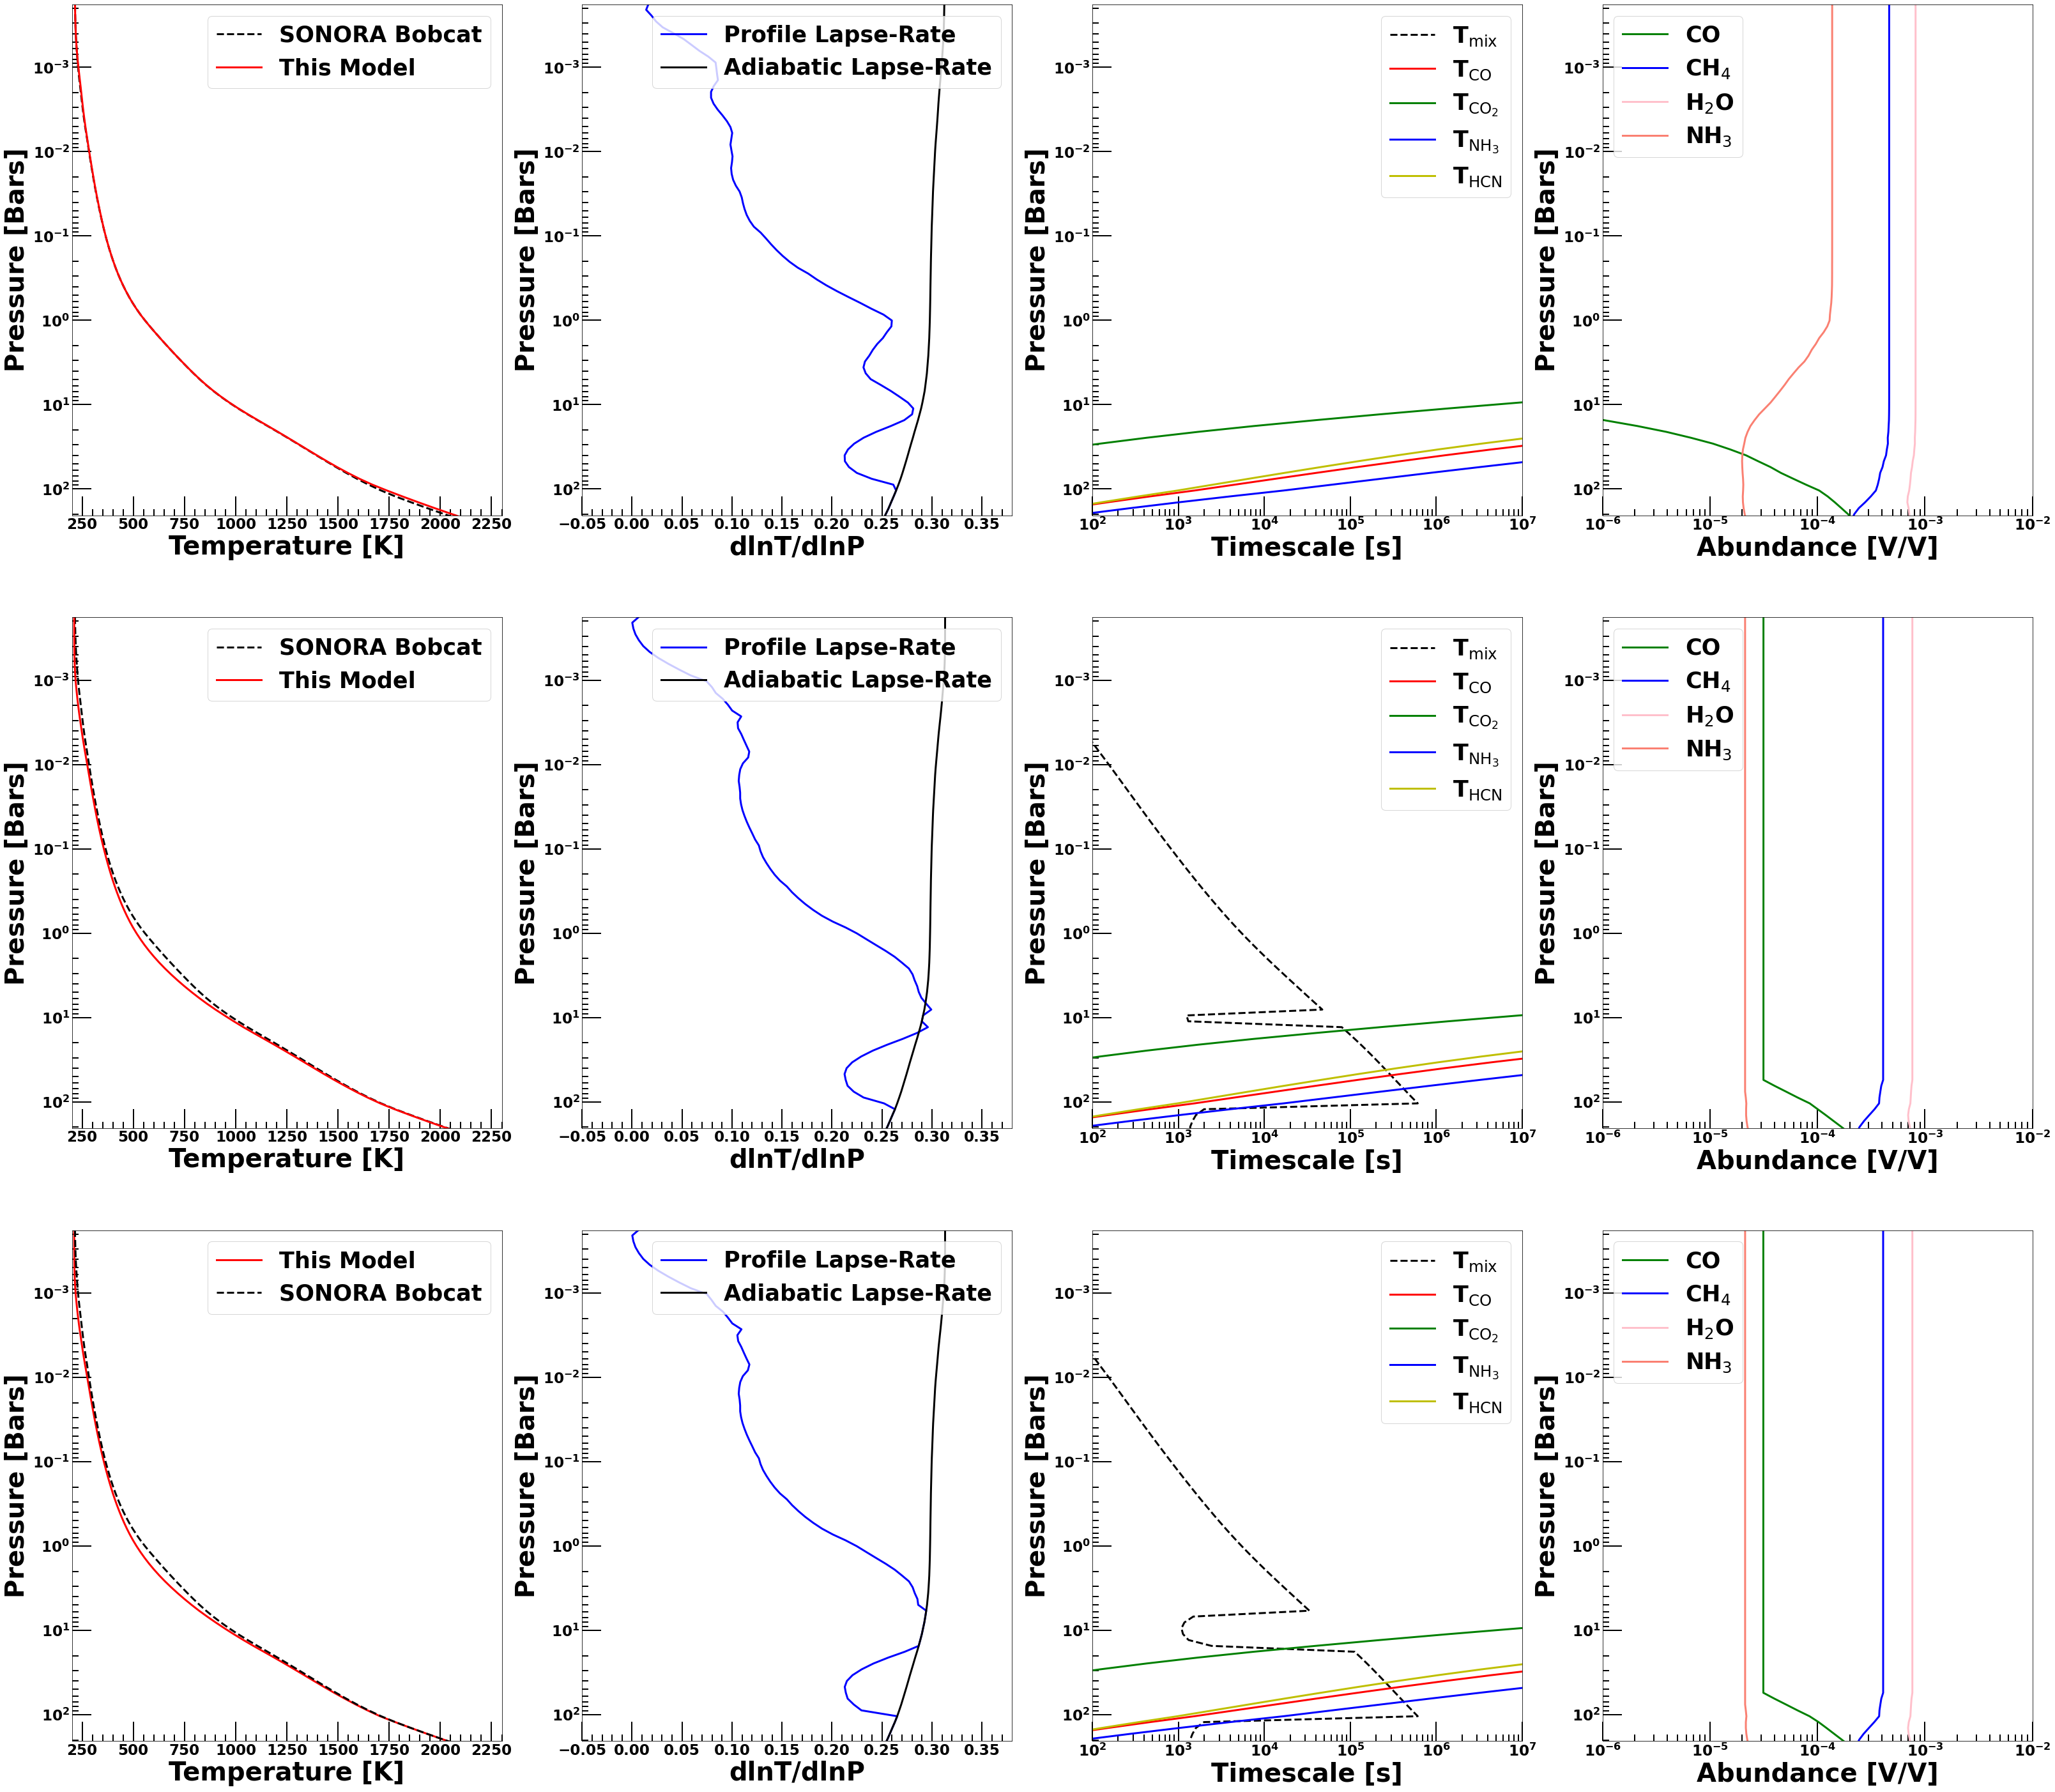

In [70]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"


x='''
AA.DD.CC.BB
EE.FF.HH.GG
II.JJ.MM.KK
'''
fig = plt.figure(figsize=(55,50))
ax = fig.subplot_mosaic(x,gridspec_kw={
        # set the height ratios between the rows
        "height_ratios": [1,1,1],
        # set the width ratios between the columns
        "width_ratios": [1,1,0.1,1,1,0.1,1,1,0.1,1,1]})

ct=17

ax['A'].semilogy(temp_bobcat,pressure_bobcat,color="k",linestyle="--",linewidth=3,label="SONORA Bobcat")
ax['A'].semilogy(all_profiles_eq[ct*91:(ct+1)*91], p_eq,linewidth=3,color='r',label="This Model")
ax['B'].loglog(co[ct*91:(ct+1)*91], p_eq,linewidth=3,color='g',label="CO")
ax['B'].loglog(ch4[ct*91:(ct+1)*91], p_eq,linewidth=3,color='b',label="CH$_4$")
ax['C'].loglog(0*p_eq,p_eq,linewidth=3,linestyle="--",color="k",label=r"T$_{\rm {mix}}$")
ax['C'].loglog(t_chem_co(p_eq,all_profiles_eq[i*91:(i+1)*91]),p_eq,linewidth=3,linestyle="solid",color="r",label=r"T$_{\rm {CO}}$")
ax['C'].loglog(t_chem_co2(p_eq,all_profiles_eq[i*91:(i+1)*91]),p_eq,linewidth=3,linestyle="solid",color="g",label=r"T$_{\rm {CO_2}}$")
ax['C'].loglog(t_chem_nh3(p_eq,all_profiles_eq[i*91:(i+1)*91]),p_eq,linewidth=3,linestyle="solid",color="b",label=r"T$_{\rm {NH_3}}$")
ax['C'].loglog(t_chem_hcn(p_eq,all_profiles_eq[i*91:(i+1)*91]),p_eq,linewidth=3,linestyle="solid",color="y",label=r"T$_{\rm {HCN}}$")

ax['B'].loglog(h2o[ct*91:(ct+1)*91], p_eq,linewidth=3,color='pink',label="H$_2$O")
ax['B'].loglog(nh3[ct*91:(ct+1)*91], p_eq,linewidth=3,color='salmon',label="NH$_3$")
ax['D'].semilogy(dtdp_arr[ct*91:(ct+1)*91], p_eq,linewidth=3,color='blue',label="Profile Lapse-Rate")
ax['D'].semilogy(grad_arr[ct*91:(ct+1)*91], p_eq,linewidth=3,color='k',label="Adiabatic Lapse-Rate")

ct=36

ax['E'].semilogy(temp_bobcat,pressure_bobcat,color="k",linestyle="--",linewidth=3,label="SONORA Bobcat")
ax['E'].semilogy(all_profiles_eq[ct*91:(ct+1)*91], p_eq,linewidth=3,color='r',label="This Model")
ax['G'].loglog(co[ct*91:(ct+1)*91], p_eq,linewidth=3,color='g',label="CO")
ax['G'].loglog(ch4[ct*91:(ct+1)*91], p_eq,linewidth=3,color='b',label="CH$_4$")
ax['H'].loglog(all_kzz_eq[(ct-step1-2)*91:((ct-step1-2)+1)*91],p_eq,linewidth=3,linestyle="--",color="k",label=r"T$_{\rm {mix}}$")
ax['H'].loglog(t_chem_co(p_eq,all_profiles_eq[i*91:(i+1)*91]),p_eq,linewidth=3,linestyle="solid",color="r",label=r"T$_{\rm {CO}}$")
ax['H'].loglog(t_chem_co2(p_eq,all_profiles_eq[i*91:(i+1)*91]),p_eq,linewidth=3,linestyle="solid",color="g",label=r"T$_{\rm {CO_2}}$")
ax['H'].loglog(t_chem_nh3(p_eq,all_profiles_eq[i*91:(i+1)*91]),p_eq,linewidth=3,linestyle="solid",color="b",label=r"T$_{\rm {NH_3}}$")
ax['H'].loglog(t_chem_hcn(p_eq,all_profiles_eq[i*91:(i+1)*91]),p_eq,linewidth=3,linestyle="solid",color="y",label=r"T$_{\rm {HCN}}$")

ax['G'].loglog(h2o[ct*91:(ct+1)*91], p_eq,linewidth=3,color='pink',label="H$_2$O")
ax['G'].loglog(nh3[ct*91:(ct+1)*91], p_eq,linewidth=3,color='salmon',label="NH$_3$")
ax['F'].semilogy(dtdp_arr[ct*91:(ct+1)*91], p_eq,linewidth=3,color='blue',label="Profile Lapse-Rate")
ax['F'].semilogy(grad_arr[ct*91:(ct+1)*91], p_eq,linewidth=3,color='k',label="Adiabatic Lapse-Rate")

ct=48

ax['I'].semilogy(all_profiles_eq[ct*91:(ct+1)*91], p_eq,linewidth=3,color='r',label="This Model")
ax['I'].semilogy(temp_bobcat,pressure_bobcat,color="k",linestyle="--",linewidth=3,label="SONORA Bobcat")
ax['K'].loglog(co[ct*91:(ct+1)*91], p_eq,linewidth=3,color='g',label="CO")
ax['K'].loglog(ch4[ct*91:(ct+1)*91], p_eq,linewidth=3,color='b',label="CH$_4$")
ax['M'].loglog(all_kzz_eq[(ct-step1-2)*91:((ct-step1-2)+1)*91],p_eq,linewidth=3,linestyle="--",color="k",label=r"T$_{\rm {mix}}$")
ax['M'].loglog(t_chem_co(p_eq,all_profiles_eq[i*91:(i+1)*91]),p_eq,linewidth=3,linestyle="solid",color="r",label=r"T$_{\rm {CO}}$")
ax['M'].loglog(t_chem_co2(p_eq,all_profiles_eq[i*91:(i+1)*91]),p_eq,linewidth=3,linestyle="solid",color="g",label=r"T$_{\rm {CO_2}}$")
ax['M'].loglog(t_chem_nh3(p_eq,all_profiles_eq[i*91:(i+1)*91]),p_eq,linewidth=3,linestyle="solid",color="b",label=r"T$_{\rm {NH_3}}$")
ax['M'].loglog(t_chem_hcn(p_eq,all_profiles_eq[i*91:(i+1)*91]),p_eq,linewidth=3,linestyle="solid",color="y",label=r"T$_{\rm {HCN}}$")

ax['K'].loglog(h2o[ct*91:(ct+1)*91], p_eq,linewidth=3,color='pink',label="H$_2$O")
ax['K'].loglog(nh3[ct*91:(ct+1)*91], p_eq,linewidth=3,color='salmon',label="NH$_3$")
ax['J'].semilogy(dtdp_arr[ct*91:(ct+1)*91], p_eq,linewidth=3,color='blue',label="Profile Lapse-Rate")
ax['J'].semilogy(grad_arr[ct*91:(ct+1)*91], p_eq,linewidth=3,color='k',label="Adiabatic Lapse-Rate")

ax['A'].set_xlabel('Temperature [K]',fontsize=40)
ax['A'].set_ylabel('Pressure [Bars]',fontsize=40)
ax['A'].set_xlim(200,2300)
ax['A'].set_ylim(205,1.8e-4)
ax['A'].legend(fontsize=35)
ax['D'].set_xlabel('dlnT/dlnP',fontsize=40)
ax['D'].set_ylabel('Pressure [Bars]',fontsize=40)
ax['D'].set_xlim(-.05,0.38)
ax['D'].set_ylim(205,1.8e-4)
ax['D'].legend(fontsize=35,loc="upper right")
ax['B'].set_xlabel('Abundance [V/V]',fontsize=40)
ax['B'].set_ylabel('Pressure [Bars]',fontsize=40)
ax['B'].set_xlim(1e-6,1e-2)
ax['B'].set_ylim(205,1.8e-4)
ax['B'].legend(fontsize=35)
ax['C'].set_xlabel('Timescale [s]',fontsize=40)
ax['C'].set_ylabel('Pressure [Bars]',fontsize=40)
ax['C'].set_xlim(1e2,1e7)
ax['C'].set_ylim(205,1.8e-4)
ax['C'].legend(fontsize=35)
ax['A'].minorticks_on()
ax['A'].tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
ax['A'].tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)
ax['B'].minorticks_on()
ax['B'].tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
ax['B'].tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)
ax['C'].minorticks_on()
ax['C'].tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
ax['C'].tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)
ax['D'].minorticks_on()
ax['D'].tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
ax['D'].tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

ax['E'].set_xlabel('Temperature [K]',fontsize=40)
ax['E'].set_ylabel('Pressure [Bars]',fontsize=40)
ax['E'].set_xlim(200,2300)
ax['E'].set_ylim(205,1.8e-4)
ax['E'].legend(fontsize=35)
ax['F'].set_xlabel('dlnT/dlnP',fontsize=40)
ax['F'].set_ylabel('Pressure [Bars]',fontsize=40)
ax['F'].set_xlim(-0.05,0.38)
ax['F'].set_ylim(205,1.8e-4)
ax['F'].legend(fontsize=35,loc="upper right")
ax['G'].set_xlabel('Abundance [V/V]',fontsize=40)
ax['G'].set_ylabel('Pressure [Bars]',fontsize=40)
ax['G'].set_xlim(1e-6,1e-2)
ax['G'].set_ylim(205,1.8e-4)
ax['G'].legend(fontsize=35)
ax['H'].set_xlabel('Timescale [s]',fontsize=40)
ax['H'].set_ylabel('Pressure [Bars]',fontsize=40)
ax['H'].set_xlim(1e2,1e7)
ax['H'].set_ylim(205,1.8e-4)
ax['H'].legend(fontsize=35)
ax['E'].minorticks_on()
ax['E'].tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
ax['E'].tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)
ax['F'].minorticks_on()
ax['F'].tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
ax['F'].tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)
ax['G'].minorticks_on()
ax['G'].tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
ax['G'].tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)
ax['H'].minorticks_on()
ax['H'].tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
ax['H'].tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

ax['I'].set_xlabel('Temperature [K]',fontsize=40)
ax['I'].set_ylabel('Pressure [Bars]',fontsize=40)
ax['I'].set_xlim(200,2300)
ax['I'].set_ylim(205,1.8e-4)
ax['I'].legend(fontsize=35)
ax['J'].set_xlabel('dlnT/dlnP',fontsize=40)
ax['J'].set_ylabel('Pressure [Bars]',fontsize=40)
ax['J'].set_xlim(-0.05,0.38)
ax['J'].set_ylim(205,1.8e-4)
ax['J'].legend(fontsize=35,loc="upper right")
ax['K'].set_xlabel('Abundance [V/V]',fontsize=40)
ax['K'].set_ylabel('Pressure [Bars]',fontsize=40)
ax['K'].set_xlim(1e-6,1e-2)
ax['K'].set_ylim(205,1.8e-4)
ax['K'].legend(fontsize=35)
ax['M'].set_xlabel('Timescale [s]',fontsize=40)
ax['M'].set_ylabel('Pressure [Bars]',fontsize=40)
ax['M'].set_xlim(1e2,1e7)
ax['M'].set_ylim(205,1.8e-4)
ax['M'].legend(fontsize=35)
ax['I'].minorticks_on()
ax['I'].tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
ax['I'].tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)
ax['J'].minorticks_on()
ax['J'].tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
ax['J'].tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)
ax['K'].minorticks_on()
ax['K'].tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
ax['K'].tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)
ax['M'].minorticks_on()
ax['M'].tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
ax['M'].tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)


plt.savefig("Benchmarking/iteration_BD_deq.pdf",bbox_inches='tight')


In [32]:
print(all_profiles_eq[50*91:(50+1)*91])
print(all_kzz_eq[(49-10)*91:((49-10)+1)*91])

[ 211.09572005  211.32907692  211.33652119  211.38111761  211.49662201
  211.72785572  212.1085502   212.71003334  213.60044014  214.83807606
  216.4626033   218.50938274  221.13943092  223.97782127  226.99896195
  230.32510326  233.88579727  237.66794183  241.86519688  245.98068408
  250.19356823  254.60654986  259.20504598  264.0000767   269.00565765
  274.04446827  278.94876894  283.82315297  288.73423641  293.70705431
  298.80845577  304.02517875  309.3338386   314.7816738   320.39929462
  326.22244485  332.27402763  338.58246551  345.16853186  352.03892555
  359.2592513   366.72654825  374.49733305  382.64194736  391.20615175
  400.24428544  409.83925216  420.12398993  431.02998584  442.65996355
  455.10637485  468.49226841  482.9573964   498.73680698  516.08536366
  534.99632923  555.44998636  577.57551748  601.52031398  627.35478039
  655.06548274  684.76340959  716.22721828  749.38720557  784.41923816
  821.18954634  860.79615175  902.1824154   945.40795115  990.50532645
 1037.